In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel("E:\My_Files\DATA_SCIENCE_SET_25_26.xlsx",sheetname="Sheet1",parse_dates = [3],na_values="0")

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
#Renaming columns
data=data.rename(columns={"User id":"User_id","Order Date":"Ordered_Date","Order Time":"Ordered_Time","bill value":"Bill_Amount","Home Address":"Home_Address","Office Address":"Office_Address","Family members":"Family_Members","Languages Known":"Languages_Known"})

In [4]:
data.head()

,User_id,Category,Product,Ordered_Date,Ordered_Time,Bill_Amount,Age,Income,Gender,Profession,Home_Address,Office_Address,Family_Members,Languages_Known
0,9123456794,11,4.0,2018-01-01 00:00:00,21:30:00,2000,26,45000,Female,Doctor,"17.4886661,78.3897115,17z(J.N.T.U)","17.4743872,78.2975193,14z(Serilingampally)",7,"Malyalam,Telugu and English"
1,9999999978,6,NaN,2018-01-04 00:00:00,22:55:00,2650,30,22000,Female,Entreprenuer,"17.400205, 78.487070","17.408753, 78.438758",2,"English, Telugu"
2,9123456782,8,8.0,2018-01-10 00:00:00,14:12:00,25000,24,50000,Female,Engineer,"17.5182524,78.4732573,13z(Bolarum)","17.3722658,78.48243,15z(Malakpet)",4,"Tamil,English and Telugu"
3,9999999975,13,NaN,2018-01-12 00:00:00,10:10:00,750,24,23000,Female,IT Professional,"17.424879, 78.507825","17.485128, 78.511785",5,"English, Telugu"
4,9123456790,9,1.0,2018-01-21 00:00:00,13:40:00,8700,28,60000,Female,Business,"17.4439716,78.3047549,13z(Gachibowli)","17.4963186,78.5403209,14z(Sainikpuri)",4,Telugu and English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 14 columns):
User_id            220 non-null int64
Category           220 non-null int64
Product            63 non-null float64
Ordered_Date       220 non-null object
Ordered_Time       220 non-null object
Bill_Amount        220 non-null int64
Age                220 non-null int64
Income             220 non-null int64
Gender             220 non-null object
Profession         220 non-null object
Home_Address       220 non-null object
Office_Address     177 non-null object
Family_Members     220 non-null int64
Languages_Known    220 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 24.1+ KB


In [6]:
data.describe()

,User_id,Category,Product,Bill_Amount,Age,Income,Family_Members
count,2.200000e+02,220.000000,63.000000,220.000000,220.000000,220.000000,220.000000
mean,9.672727e+09,6.881818,4.857143,3270.518182,30.150000,30359.090909,4.104545
std,4.256123e+08,4.263537,2.787398,6055.698128,11.645849,19188.637217,1.986938
min,9.000000e+09,1.000000,1.000000,15.000000,13.000000,0.000000,1.000000
25%,9.123457e+09,2.000000,2.000000,546.750000,23.000000,22000.000000,3.000000
50%,1.000000e+10,6.000000,5.000000,1500.000000,26.000000,30000.000000,4.000000
75%,1.000000e+10,11.000000,7.000000,3000.000000,32.000000,45000.000000,5.000000
max,1.000000e+10,14.000000,11.000000,50000.000000,62.000000,100000.000000,8.000000


In [7]:
data.isnull().sum()

User_id              0
Category             0
Product            157
Ordered_Date         0
Ordered_Time         0
Bill_Amount          0
Age                  0
Income               0
Gender               0
Profession           0
Home_Address         0
Office_Address      43
Family_Members       0
Languages_Known      0
dtype: int64

### Data Preprocessing

In [8]:
#data.User_id.value_counts().sort_index()
data.shape

(220, 14)

### Needs vs Luxury

In [9]:
data.Income.value_counts().sort_index()

0         31
6000       6
15000      1
16000      6
20000      6
22000     12
23000     14
25000     15
28000      2
30000     46
35000      3
37000      8
38000      2
40000      1
42000      4
45000     30
50000     20
60000      5
75000      3
85000      3
100000     2
Name: Income, dtype: int64

In [10]:
data.Income.loc[data.Income==0]=np.round(data.Income.mean(),2)
data.iloc[[31,32,48,50,51,53]]

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,User_id,Category,Product,Ordered_Date,Ordered_Time,Bill_Amount,Age,Income,Gender,Profession,Home_Address,Office_Address,Family_Members,Languages_Known
31,9999999986,13,NaN,2018-02-27 00:00:00,18:03:00,500,13,30359.09,Male,Student,"17.496305, 78.407876",NaN,3,English
32,9999999986,13,NaN,2018-02-28 00:00:00,19:10:00,500,13,30359.09,Male,Student,"17.496305, 78.407876",NaN,3,English
48,9999999987,14,NaN,2018-03-27 00:00:00,12:45:00,600,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"
50,9999999987,1,NaN,2018-03-28 00:00:00,21:13:00,1500,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"
51,9999999987,1,NaN,2018-03-29 00:00:00,18:03:00,1500,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"
53,9999999987,10,NaN,2018-03-31 00:00:00,08:50:00,3200,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"


In [11]:
data.groupby(["Category"])["Bill_Amount"].count()

Category
1     38
2     20
3     13
5     12
6     28
7      7
8      3
9     11
10    28
11    29
12     9
13    18
14     4
Name: Bill_Amount, dtype: int64

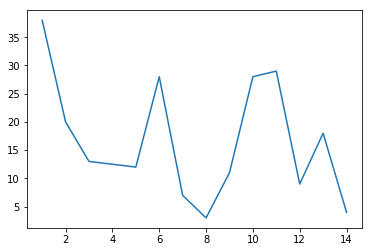

In [12]:
data.Category.value_counts().sort_index().plot()

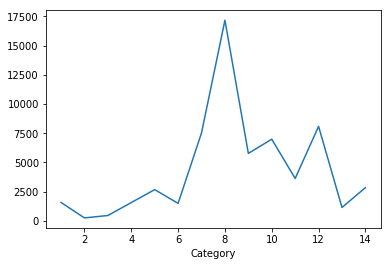

In [13]:
%matplotlib inline
data.groupby(["Category"])["Bill_Amount"].mean().plot()

In [14]:
data.set_index("Category").T.head()

Category,11,6,8,13,9,9,10,10,11,8,...,13,10,9,6,6,2,6,2,1,11
User_id,9123456794,9999999978,9123456782,9999999975,9123456790,9123456789,9123456794,9123456798,9123456799,9123456782,...,9999999974,9999999982,9999999982,9999999983,9999999983,9999999978,9999999983,9999999976,9999999984,9999999989
Product,4,NaN,8,NaN,1,8,7,1,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ordered_Date,2018-01-01 00:00:00,2018-01-04 00:00:00,2018-01-10 00:00:00,2018-01-12 00:00:00,2018-01-21 00:00:00,2018-01-21 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,...,2018-12-13 00:00:00,2018-12-14 00:00:00,2018-12-15 00:00:00,2018-12-16 00:00:00,2018-12-17 00:00:00,2018-12-17 00:00:00,2018-12-18 00:00:00,2018-12-30 00:00:00,2018-12-31 00:00:00,05-04-218
Ordered_Time,21:30:00,22:55:00,14:12:00,10:10:00,13:40:00,15:30:00,13:40:00,13:35:00,17:45:00,18:25:00,...,12:45:00,12:45:00,11:10:00,20:25:00,10:25:00,19:00:00,08:55:00,18:30:00,18:55:32,21:00:00
Bill_Amount,2000,2650,25000,750,8700,1500,22000,2200,1400,20000,...,466,1300,1050,400,500,450,750,280,1560,1500


In [15]:
data_2=data.loc[:,["User_id","Category","Bill_Amount","Income"]]
print(data_2.head())
#data_2=data_2.set_index("Category").T

      User_id  Category  Bill_Amount   Income
0  9123456794        11         2000  45000.0
1  9999999978         6         2650  22000.0
2  9123456782         8        25000  50000.0
3  9999999975        13          750  23000.0
4  9123456790         9         8700  60000.0


In [16]:
data_2.Income.value_counts().sort_index()

6000.00       6
15000.00      1
16000.00      6
20000.00      6
22000.00     12
23000.00     14
25000.00     15
28000.00      2
30000.00     46
30359.09     31
35000.00      3
37000.00      8
38000.00      2
40000.00      1
42000.00      4
45000.00     30
50000.00     20
60000.00      5
75000.00      3
85000.00      3
100000.00     2
Name: Income, dtype: int64

In [17]:
data_2["Income_cat"]=data.Income
print(data_2.head())
#data_2.Income_cat.loc[data_2.Income<=50000]=0
#data_2.Income_cat.loc[data_2.Income>50000]=1
#data_2.Income_cat=data_2.Income_cat.astype(int)
#data_2.head()

      User_id  Category  Bill_Amount   Income  Income_cat
0  9123456794        11         2000  45000.0     45000.0
1  9999999978         6         2650  22000.0     22000.0
2  9123456782         8        25000  50000.0     50000.0
3  9999999975        13          750  23000.0     23000.0
4  9123456790         9         8700  60000.0     60000.0


In [18]:
for i in range(0,len(data_2)):
    if data_2.Income.iloc[i] <= 25000:
        data_2.Income_cat.iloc[i]="Lower"
    elif data_2.Income.iloc[i] <= 45000:
        data_2.Income_cat.iloc[i]="Lower_Middle"
    elif data_2.Income.iloc[i] <= 65000:
        data_2.Income_cat.iloc[i]="Upper_Middle"
    elif data_2.Income.iloc[i] > 65000:
        data_2.Income_cat.iloc[i]="High"
        

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
data_2.head()

,User_id,Category,Bill_Amount,Income,Income_cat
0,9123456794,11,2000,45000.0,Lower_Middle
1,9999999978,6,2650,22000.0,Lower
2,9123456782,8,25000,50000.0,Upper_Middle
3,9999999975,13,750,23000.0,Lower
4,9123456790,9,8700,60000.0,Upper_Middle


In [20]:
data_2.Income_cat.iloc[33]

'High'

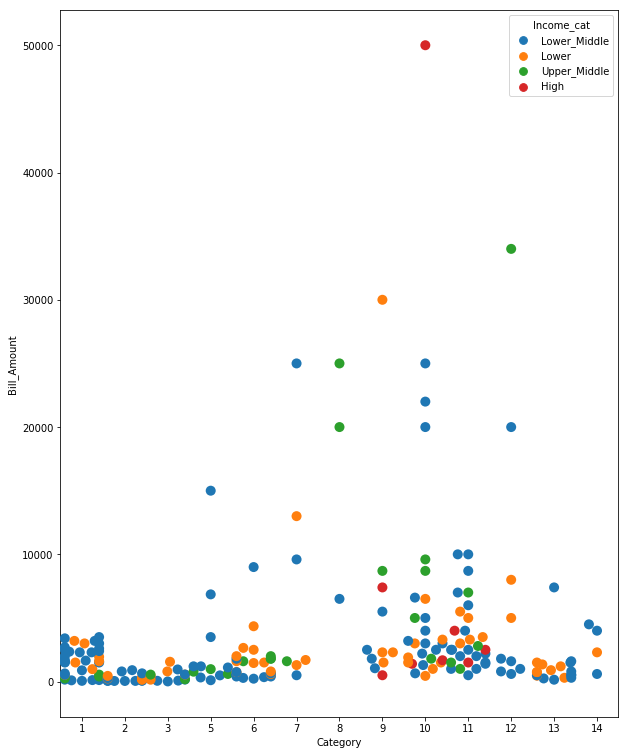

In [29]:
f, ax = plt.subplots(figsize=(10,10
                             ))
sns.swarmplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat,size=10)

In [22]:
#sns.stripplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2, jitter=True,hue=data_2.Income_cat)

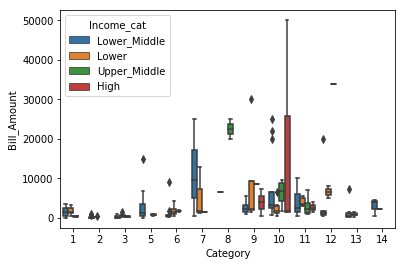

In [23]:
sns.boxplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat,saturation=0.75, width=0.8, dodge=True, fliersize=5 );

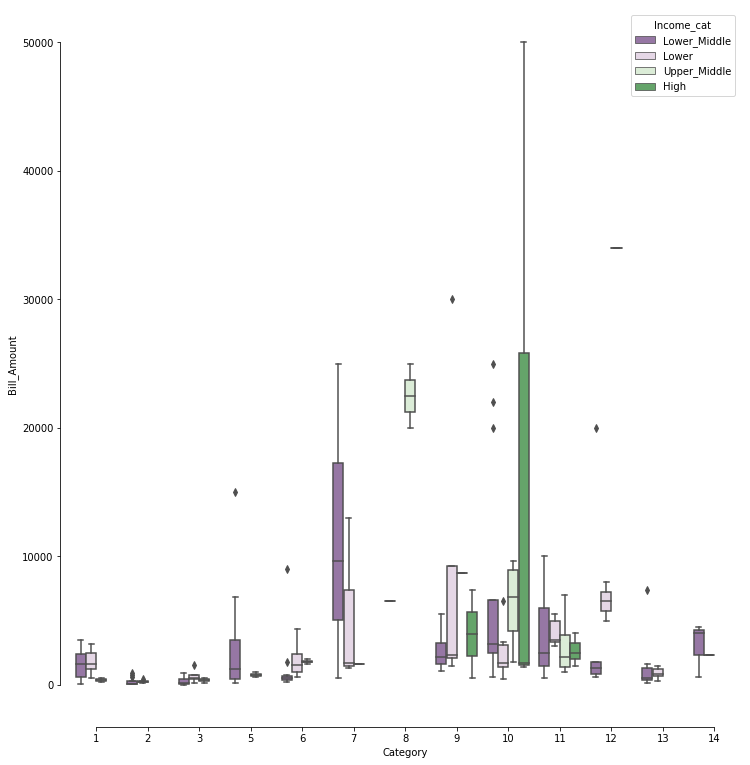

In [24]:
# Draw a nested boxplot 
f, ax = plt.subplots(figsize=(12, 13))
sns.boxplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat, palette="PRGn",orient="v")
sns.despine(offset=10, trim=True)

In [25]:
#f, ax = plt.subplots(figsize=(12, 13))
#sns.violinplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat, palette="PRGn")

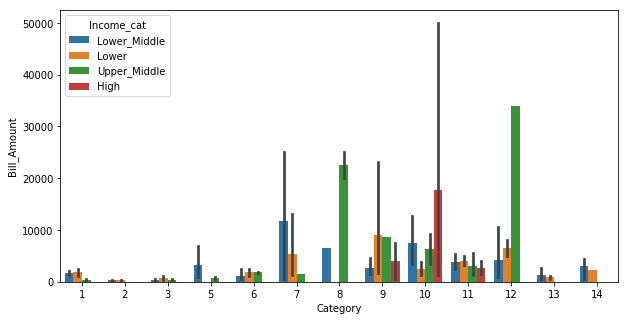

In [26]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat)

In [30]:
Users_data=data_2.groupby(["Category"])

In [32]:
for Category,group in Users_data:
    print(Category)
    print(group)
    

1
        User_id  Category  Bill_Amount    Income    Income_cat
16   9123456782         1          400  50000.00  Upper_Middle
26   9999999975         1         1600  23000.00         Lower
35   9999999980         1          980  25000.00         Lower
45   9999999980         1          530  25000.00         Lower
50   9999999987         1         1500  30359.09  Lower_Middle
51   9999999987         1         1500  30359.09  Lower_Middle
59   9123456782         1          550  50000.00  Upper_Middle
68   9999999982         1          888  30000.00  Lower_Middle
72   9999999986         1           60  30359.09  Lower_Middle
75   9999999978         1         3200  22000.00         Lower
92   9999999982         1          100  30000.00  Lower_Middle
100  9999999972         1          120  30000.00  Lower_Middle
103  9999999982         1          156  30000.00  Lower_Middle
109  9999999991         1         2300  42000.00  Lower_Middle
113  9999999991         1         2350  42000.00  Low

In [33]:
data_2.User_id.unique()

array([9123456794, 9999999978, 9123456782, 9999999975, 9123456790,
       9123456789, 9123456798, 9123456799, 9123456781, 9123456793,
       9999999981, 9123456787, 9123456785, 9123456780, 9123456792,
       9999999980, 9123456783, 9123456796, 9123456791, 9999999986,
       9123456786, 9999999985, 9999999988, 9999999973, 9999999991,
       9999999987, 9123456788, 9999999983, 9999999982, 9123456797,
       9999999984, 9123456784, 9000000006, 9999999976, 9999999979,
       9999999972, 9999999971, 9999999974, 9123456795, 9999999990,
       9999999989, 9999999977], dtype=int64)

In [34]:
Users_data.get_group(1)

,User_id,Category,Bill_Amount,Income,Income_cat
16,9123456782,1,400,50000.00,Upper_Middle
26,9999999975,1,1600,23000.00,Lower
35,9999999980,1,980,25000.00,Lower
45,9999999980,1,530,25000.00,Lower
50,9999999987,1,1500,30359.09,Lower_Middle
51,9999999987,1,1500,30359.09,Lower_Middle
59,9123456782,1,550,50000.00,Upper_Middle
68,9999999982,1,888,30000.00,Lower_Middle
72,9999999986,1,60,30359.09,Lower_Middle
75,9999999978,1,3200,22000.00,Lower


In [35]:
Users1_data=data_2.groupby(["User_id"])

In [36]:
for User_id,grp in Users1_data:
    print(User_id)
    print(grp)

9000000006
       User_id  Category  Bill_Amount   Income    Income_cat
86  9000000006        11        10000  35000.0  Lower_Middle
9123456780
        User_id  Category  Bill_Amount   Income    Income_cat
17   9123456780        11        10000  30000.0  Lower_Middle
36   9123456780         8         6500  30000.0  Lower_Middle
40   9123456780        10         3000  30000.0  Lower_Middle
117  9123456780         9         1800  30000.0  Lower_Middle
118  9123456780        11         2500  30000.0  Lower_Middle
122  9123456780        10         3000  30000.0  Lower_Middle
124  9123456780         9         2500  30000.0  Lower_Middle
128  9123456780        11         4000  30000.0  Lower_Middle
155  9123456780        11         7000  30000.0  Lower_Middle
9123456781
        User_id  Category  Bill_Amount   Income    Income_cat
10   9123456781        10        25000  30000.0  Lower_Middle
129  9123456781        11         2500  30000.0  Lower_Middle
9123456782
        User_id  Category  B

In [171]:
Users2_data=data_2.groupby(["User_id","Category"])
#Users2_data.head()
#print(Users2_data)

In [172]:
for User_id,grp in Users2_data:
    print(User_id)
    print(grp)

(9000000006, 11)
       User_id  Category  Bill_Amount   Income    Income_cat
86  9000000006        11        10000  35000.0  Lower_Middle
(9123456780, 8)
       User_id  Category  Bill_Amount   Income    Income_cat
36  9123456780         8         6500  30000.0  Lower_Middle
(9123456780, 9)
        User_id  Category  Bill_Amount   Income    Income_cat
117  9123456780         9         1800  30000.0  Lower_Middle
124  9123456780         9         2500  30000.0  Lower_Middle
(9123456780, 10)
        User_id  Category  Bill_Amount   Income    Income_cat
40   9123456780        10         3000  30000.0  Lower_Middle
122  9123456780        10         3000  30000.0  Lower_Middle
(9123456780, 11)
        User_id  Category  Bill_Amount   Income    Income_cat
17   9123456780        11        10000  30000.0  Lower_Middle
118  9123456780        11         2500  30000.0  Lower_Middle
128  9123456780        11         4000  30000.0  Lower_Middle
155  9123456780        11         7000  30000.0  Lowe

174  9999999985         1          250  50000.0  Upper_Middle
(9999999985, 3)
        User_id  Category  Bill_Amount   Income    Income_cat
196  9999999985         3          183  50000.0  Upper_Middle
209  9999999985         3          550  50000.0  Upper_Middle
(9999999985, 5)
       User_id  Category  Bill_Amount   Income    Income_cat
37  9999999985         5          980  50000.0  Upper_Middle
87  9999999985         5          780  50000.0  Upper_Middle
(9999999985, 7)
        User_id  Category  Bill_Amount   Income    Income_cat
166  9999999985         7         1600  50000.0  Upper_Middle
(9999999986, 1)
        User_id  Category  Bill_Amount    Income    Income_cat
72   9999999986         1           60  30359.09  Lower_Middle
146  9999999986         1          120  30359.09  Lower_Middle
148  9999999986         1          240  30359.09  Lower_Middle
(9999999986, 13)
       User_id  Category  Bill_Amount    Income    Income_cat
31  9999999986        13          500  30359.09  L

In [174]:
#Users2_data.mean()

In [175]:
p=Users2_data.mean()
p.head()

Bill_Amount   Income
User_id    Category                      
9000000006 11            10000.0  35000.0
9123456780 8              6500.0  30000.0
           9              2150.0  30000.0
           10             3000.0  30000.0
           11             5875.0  30000.0

In [176]:
print(Users2_data.keys)
Users2_data.keys[1]
#Users2_data.groups

['User_id', 'Category']


'Category'

In [177]:
Users2_data.get_group((9000000006,11))

,User_id,Category,Bill_Amount,Income,Income_cat
86,9000000006,11,10000,35000.0,Lower_Middle


In [178]:
keys=list(Users2_data.groups.keys())
keys

[(9000000006, 11),
 (9123456780, 8),
 (9123456780, 9),
 (9123456780, 10),
 (9123456780, 11),
 (9123456781, 10),
 (9123456781, 11),
 (9123456782, 1),
 (9123456782, 5),
 (9123456782, 6),
 (9123456782, 8),
 (9123456782, 10),
 (9123456782, 11),
 (9123456782, 12),
 (9123456783, 6),
 (9123456783, 7),
 (9123456783, 9),
 (9123456783, 10),
 (9123456783, 11),
 (9123456783, 12),
 (9123456783, 13),
 (9123456783, 14),
 (9123456784, 10),
 (9123456784, 11),
 (9123456785, 9),
 (9123456785, 10),
 (9123456785, 11),
 (9123456786, 9),
 (9123456786, 10),
 (9123456786, 11),
 (9123456787, 9),
 (9123456787, 10),
 (9123456787, 11),
 (9123456788, 11),
 (9123456789, 9),
 (9123456789, 10),
 (9123456789, 11),
 (9123456790, 9),
 (9123456790, 10),
 (9123456790, 11),
 (9123456791, 9),
 (9123456791, 10),
 (9123456791, 11),
 (9123456792, 10),
 (9123456792, 11),
 (9123456793, 10),
 (9123456793, 11),
 (9123456794, 10),
 (9123456794, 11),
 (9123456795, 10),
 (9123456795, 11),
 (9123456796, 10),
 (9123456796, 11),
 (912345

In [179]:
keys[0]

(9000000006, 11)

In [180]:
[x[1] for x in keys]

[11,
 8,
 9,
 10,
 11,
 10,
 11,
 1,
 5,
 6,
 8,
 10,
 11,
 12,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 7,
 1,
 2,
 3,
 10,
 13,
 1,
 2,
 3,
 6,
 7,
 13,
 1,
 6,
 13,
 1,
 2,
 3,
 6,
 13,
 1,
 2,
 3,
 6,
 7,
 10,
 12,
 13,
 2,
 10,
 13,
 1,
 3,
 6,
 9,
 2,
 3,
 7,
 12,
 14,
 1,
 2,
 3,
 5,
 6,
 9,
 10,
 11,
 13,
 6,
 1,
 2,
 1,
 3,
 5,
 7,
 1,
 13,
 1,
 2,
 6,
 10,
 11,
 14,
 5,
 10,
 11,
 2,
 1,
 5]

In [185]:
p_df=pd.DataFrame()
for key in keys:
    p_df=p_df.append(Users2_data.get_group(key))

print(p_df)

    

        User_id  Category  Bill_Amount     Income    Income_cat
86   9000000006        11        10000   35000.00  Lower_Middle
36   9123456780         8         6500   30000.00  Lower_Middle
117  9123456780         9         1800   30000.00  Lower_Middle
124  9123456780         9         2500   30000.00  Lower_Middle
40   9123456780        10         3000   30000.00  Lower_Middle
122  9123456780        10         3000   30000.00  Lower_Middle
17   9123456780        11        10000   30000.00  Lower_Middle
118  9123456780        11         2500   30000.00  Lower_Middle
128  9123456780        11         4000   30000.00  Lower_Middle
155  9123456780        11         7000   30000.00  Lower_Middle
10   9123456781        10        25000   30000.00  Lower_Middle
129  9123456781        11         2500   30000.00  Lower_Middle
16   9123456782         1          400   50000.00  Upper_Middle
59   9123456782         1          550   50000.00  Upper_Middle
120  9123456782         5          600  

In [182]:
p_df.head()

,User_id,Category,Bill_Amount,Income,Income_cat
86,9000000006,11,10000,35000.0,Lower_Middle
36,9123456780,8,6500,30000.0,Lower_Middle
117,9123456780,9,1800,30000.0,Lower_Middle
124,9123456780,9,2500,30000.0,Lower_Middle
40,9123456780,10,3000,30000.0,Lower_Middle


In [188]:
p_df=p_df.append(p["Bill_Amount"],columns=['letter', 'number'])

C:\Users\Tester\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: '<' not supported between instances of 'str' and 'tuple', sort order is undefined for incomparable objects
  """Entry point for launching an IPython kernel.


TypeError: Expected tuple, got str

In [159]:
for x in keys:
    new_df=p_df.loc[(Users2_data["User_id"]==x[0]) & (Users2_data["Category"]==x[1]),Users2_data["Bill_Amount"].mean()]


KeyError: False

In [ ]:
 #df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

In [164]:
new_df=[p_df.loc[(Users2_data["User_id"]== x[0]) & (Users2_data["Category"]== x[1]),Users2_data["Bill_Amount"].mean()] for x in keys]

KeyError: False